# Visualization - Group Part

### Team Name: MeowMeowMeow
### Team Member: Jiawei Li, Ting Zhan, Yun Zhou, Xinyan Yang

**The name of dataset**

Traffic Violations in Montgomery County of Maryland

**Where can obtain it?**

Got from data.gov website. 

website: https://catalog.data.gov/dataset/traffic-violations-56dda/resource/450018e7-f6c0-43fd-b5c9-a83de293b206

**License**

U.S. Federal data available through Data.gov is offered free and without restriction. Data and content created by government employees within the scope of their employment are not subject to domestic copyright protection under 17 U.S.C. § 105.
Non-federal data available through Data.gov may have different licensing. Non-federal data can be identified by name of the publisher and the diagonal banner that shows up on the search results and data set pages. Federal data will have a banner noting “Federal” and non-federal banners will note “University”, “Multiple Sources”, “State”, etc. Check the “Access and Use” section on each dataset page to find the terms applicable to that particular dataset.
(from https://www.data.gov/privacy-policy#license)

**What allow us to do?**

The data.gov allows us to download the data and use the data.

**Information about the dataset**

This dataset contains information about the traffic violation in the Montgomery County of Maryland, in 2017. It records the time, location of each traffic violation, as well as the degrees of injury, type of vehicles, and other details of the violation. 

The original dataset is 465.4 MB, and contains 65534 entires. So, in this project, our group decides to only choose the data in 2017 with only 188803 entries, 67.9MB. 

**Why we choose this dataset?**

This dataset contains traffic violation information from all electronic traffic violations issued in the County. The reason why we choose this dataset is that driving safe has always been the top concern in our life. There are more drivers on the road every year. Traffic can become extremely congested at times. It is important for one to stay focused on driving and not become distracted by texting, talking on the cell phone or changing the radio station. Therefore, being pulled over by police is really worth learning and exploring.




## Import Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets
from itertools import islice
from scipy import stats, integrate
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import math
import folium

In [2]:
df = pd.read_csv('traffic_data.csv', parse_dates = ['Date Of Stop', 'Time Of Stop'])

## Data Processing 

Extract Month from date_of_stop:

In [3]:
month = []
for i in df['Date Of Stop']:
    month.append(i.strftime("%b"))
df['Month'] = month

Split stop_of_time to Morning, Afternoon, Evening and Night:

In [4]:
hour = []
for i in df['Time Of Stop']:
    if 5 <= i.hour < 12:
        hour.append('Morning')
    elif 12<= i.hour < 17:
        hour.append('Afternoon')
    elif 17<= i.hour < 22:
        hour.append('Evening')
    else:
        hour.append('Night')
df['Hour'] = hour

Transfer the violation descriptions to types:

In [5]:
descri_type = []
for reason in df['Description']:
    if ('EXCEEDING' in reason) & ('SPEED' in reason):
        descri_type.append('Type1')
    elif ('ALCOHOL' in reason):
        descri_type.append('Type4')
    elif reason == 'DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS':
        descri_type.append('Type2')
    elif reason == 'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER':
        descri_type.append('Type3')
    elif reason == 'DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION':
        descri_type.append('Type5')
    else:
        descri_type.append('Type6')
df['Description Type'] = descri_type 

## Visualizations

### Heat Map of Correlation among Multiple Factors

We generate a heat map to test the correlations among the following factors: location, date, hour, gender, race, and description type.

Description Type    1.000000
Hour                0.138824
Longitude           0.084252
Gender              0.053524
Month               0.006928
Race               -0.008563
Latitude           -0.070797
Name: Description Type, dtype: float64


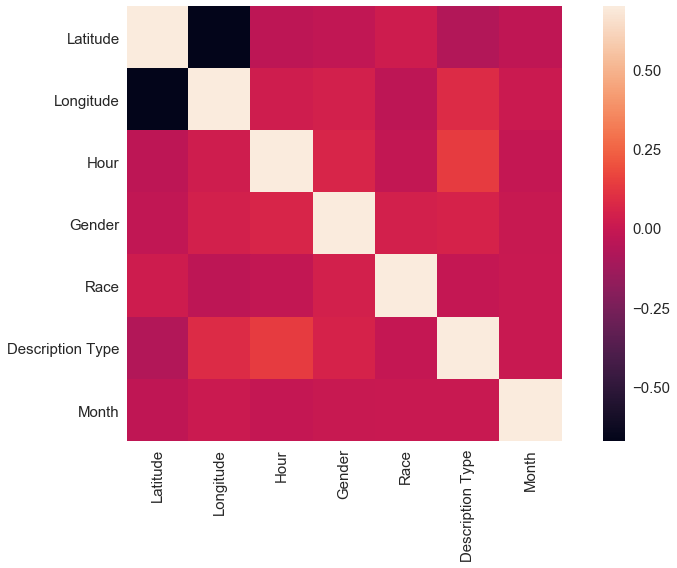

In [6]:
sns.set(color_codes=True, font_scale=1.5)
new_df = df.loc[:,['Latitude','Longitude','Date Of Stop','Hour','Gender','Race','Description Type']]
new_month = []
for i in new_df['Date Of Stop']:
    new_month.append(i.month)
new_df['Month'] = new_month
new_df = new_df.drop('Date Of Stop',axis=1)

new_hour = []
for i in new_df['Hour']:
    if i =='Morning':
        new_hour.append(1)
    elif i == 'Afternnon':
        new_hour.append(2)
    elif i =='Evening':
        new_hour.append(3)
    else:
        new_hour.append(4)
new_df['Hour'] = new_hour

new_gender = []
for i in new_df['Gender']:
    if i =='F':
        new_gender.append(1)
    elif i == 'M':
        new_gender.append(2)
    else:
        new_gender.append(3)
new_df['Gender'] = new_gender

new_race = []
for i in new_df['Race']:
    if i =='BLACK':
        new_race.append(1)
    elif i == 'WHITE':
        new_race.append(2)
    elif i == 'NATIVE AMERICAN':
        new_race.append(3)
    elif i == 'HISPANIC':
        new_race.append(4)
    elif i == 'ASIAN':
        new_race.append(5)
    else:
        new_race.append(6)
new_df['Race'] = new_race

new_descri = []
for i in new_df['Description Type']:
    if i =='Type1':
        new_descri.append(1)
    elif i == 'Type2':
        new_descri.append(2)
    elif i == 'Type3':
        new_descri.append(3)
    elif i == 'Type4':
        new_descri.append(4)
    elif i == 'Type5':
        new_descri.append(5)
    else:
        new_descri.append(6)
new_df['Description Type'] = new_descri

def RF_model(data):
    # build the correclation matrix
    
    plt.figure(figsize = (15,8))
    matrix = data.corr()
    sns.heatmap(matrix, vmax=0.7, square=True)
    interesting_variables = matrix['Description Type'].sort_values(ascending=False)
    print(interesting_variables)
    
RF_model(new_df)

### Word Cloud of Violation Reasons and Factors around Vehicle

We generate a word cloud to see the high frequent reasons for volations and some features around the vehicle.

Users can use the dropdown list to choose what they want to see.

In [7]:
def WorldCloud(col_name):
    text = ''
    for data in df[col_name]:
        text = text + str(data)

    car_coloring = np.array(Image.open("car.jpg"))
    if col_name == 'Description':
        wordcloud = WordCloud(background_color="white",
                              max_words=200, mask=car_coloring, max_font_size=60, random_state=42)
    else:
        
        wordcloud = WordCloud(background_color="white",collocations=False,
                              max_words=200, mask=car_coloring, max_font_size=100, random_state=42)
        
    wordcloud.generate(text)
    image_colors = ImageColorGenerator(car_coloring)
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(111)
    ax.axis('off')
    plt.title(col_name, fontsize = 18)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.show()

col_name = ['Description','Make', 'Model', 'Color']   
ipywidgets.interact(WorldCloud, col_name = col_name)

interactive(children=(Dropdown(description='col_name', options=('Description', 'Make', 'Model', 'Color'), value='Description'), Output()), _dom_classes=('widget-interact',))

<function __main__.WorldCloud>

### Visualizations for Certain Parameters of Violation Using Bar Chart

In this visualization, we use three bar charts to show the varies of three parameters (degree of injury, violation type and the reasons for violation). Users can use dropdown list to interact with these charts.

In [8]:
def GenderRace(gender, race):
    fig = plt.figure(figsize = (25, 7))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    filtered_df = df
    if gender != 'A':
        filtered_df = filtered_df[filtered_df['Gender'] == gender]
    if race != 'All':
        filtered_df = filtered_df[filtered_df['Race'] == race]
    
    colors = 'rgbkymc' 
    number1 = []
    personalinjury = len(filtered_df[filtered_df['Personal Injury'] == 'Yes'])
    propertydamage = len(filtered_df[filtered_df['Property Damage'] == 'Yes'])
    fatal = len(filtered_df[filtered_df['Fatal'] == 'Yes'])

    number1.append(personalinjury)
    number1.append(propertydamage)
    number1.append(fatal)

    index1 = range(len(number1))
    ax1.set_xlabel('Degrees')
    ax1.set_ylabel('Number of Violations')
    ax1.set_title('Degree of Injury')
    ax1.bar(index1, number1, 0.35,color = colors)
    ax1.set_xticks(index1)
    ax1.set_xticklabels(('Personal Injury', 'Property Damage', 'Fatal'))
        
    number2 = []
    citation = len(filtered_df[filtered_df['Violation Type']== 'Citation'])
    esero = len(filtered_df[filtered_df['Violation Type'] == 'ESERO'])
    warning = len(filtered_df[filtered_df['Violation Type'] == 'Warning'])

    number2.append(citation)
    number2.append(esero)
    number2.append(warning)

    index2 = range(len(number2))
    ax2.set_xlabel('Violation')
    ax2.set_title('Violation Type')
    ax2.bar(index2, number2, 0.35,color = colors)
    ax2.set_xticks(index2)
    ax2.set_xticklabels(('Citation', 'ESERO', 'Warning'))
    
    number3 = []
    t1 = len(filtered_df[filtered_df['Description Type']== 'Type1'])
    t2 = len(filtered_df[filtered_df['Description Type'] == 'Type2'])
    t3 = len(filtered_df[filtered_df['Description Type'] == 'Type3'])
    t4 = len(filtered_df[filtered_df['Description Type'] == 'Type4'])
    t5 = len(filtered_df[filtered_df['Description Type'] == 'Type5'])  

    number3.append(t1)
    number3.append(t2)
    number3.append(t3)
    number3.append(t4)
    number3.append(t5)

    index3 = range(len(number3))
    ax3.set_xlabel('Reason')
    ax3.set_title('Description Type')
    ax3.bar(index3, number3, 0.35,color = colors)
    ax3.set_xticks(index3)
    ax3.set_xticklabels(('Type 1', 'Type 2','Type 3','Type 4','Type 5'))

gender = {'All':'A','Female':'F','Male':'M','Unknown':'U'}  
race = ['All', 'ASIAN','BLACK','HISPANIC','BLACK','OTHER']
ipywidgets.interact(GenderRace, gender = gender, race = race)

# Print the top five reasons for violations
reasons = {}
for data in df['Description']:
    if ('EXCEEDING' in data) & ('SPEED' in data):
        data = 'EXCEEDING SPEED'
    if ('ALCOHOL' in data):
        data = 'ALCOHOL'
    if data in reasons:
        reasons[data] += 1
    else:
        reasons[data] = 1

od = sorted(reasons, key = lambda x: reasons[x], reverse = True)
types = {}
index = 1
for i in range(5):
    key = 'Type' + str(index)
    types[key] = od[i]
    index += 1
    
text = ''
for key, value in types.items():
    text += key + ': ' + value + '\n'
print("Top 5 Description Reasons:")
print(text)

interactive(children=(Dropdown(description='gender', options={'All': 'A', 'Female': 'F', 'Male': 'M', 'Unknown': 'U'}, value='A'), Dropdown(description='race', options=('All', 'ASIAN', 'BLACK', 'HISPANIC', 'BLACK', 'OTHER'), value='All'), Output()), _dom_classes=('widget-interact',))

Top 5 Description Reasons:
Type1: EXCEEDING SPEED
Type2: DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
Type3: FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER
Type4: ALCOHOL
Type5: DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION



In this visualization, we use the three parameters as above. We explore them according to month and time period to see how them changed in different time. Users can click buttons to interact with these charts.

In [9]:
def MonthDay(month, hour):
    fig = plt.figure(figsize = (25, 7))
    
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    filtered_df = df
    if month != 'All':
        filtered_df = filtered_df[filtered_df['Month'] == month]
    if hour != 'All':
        filtered_df = filtered_df[filtered_df['Hour'] == hour]
        
    colors = 'rgbkymc' 

    number1 = []
    personalinjury = len(filtered_df[filtered_df['Personal Injury'] == 'Yes'])
    propertydamage = len(filtered_df[filtered_df['Property Damage'] == 'Yes'])
    fatal = len(filtered_df[filtered_df['Fatal'] == 'Yes'])

    number1.append(personalinjury)
    number1.append(propertydamage)
    number1.append(fatal)

    index1 = range(len(number1))
    ax1.set_xlabel('Degrees')
    ax1.set_ylabel('Number of Violations')
    ax1.set_title('Degree of Injury')
    ax1.bar(index1, number1, 0.35,color = colors)
    ax1.set_xticks(index1)
    ax1.set_xticklabels(('Personal Injury', 'Property Damage', 'Fatal'))
        
    number2 = []
    citation = len(filtered_df[filtered_df['Violation Type']== 'Citation'])
    esero = len(filtered_df[filtered_df['Violation Type'] == 'ESERO'])
    warning = len(filtered_df[filtered_df['Violation Type'] == 'Warning'])

    number2.append(citation)
    number2.append(esero)
    number2.append(warning)

    index2 = range(len(number2))
    ax2.set_xlabel('Violation')
    ax2.set_title('Violation Type')
    ax2.bar(index2, number2, 0.35,color = colors)
    ax2.set_xticks(index2)
    ax2.set_xticklabels(('Citation', 'ESERO', 'Warning'))
    
    number3 = []
    t1 = len(filtered_df[filtered_df['Description Type']== 'Type1'])
    t2 = len(filtered_df[filtered_df['Description Type'] == 'Type2'])
    t3 = len(filtered_df[filtered_df['Description Type'] == 'Type3'])
    t4 = len(filtered_df[filtered_df['Description Type'] == 'Type4'])
    t5 = len(filtered_df[filtered_df['Description Type'] == 'Type5'])

    number3.append(t1)
    number3.append(t2)
    number3.append(t3)
    number3.append(t4)
    number3.append(t5)

    index3 = range(len(number3))
    ax3.set_xlabel('Reason')
    ax3.set_title('Description Type')
    ax3.bar(index3, number3, 0.35, color = colors)
    ax3.set_xticks(index3)
    ax3.set_xticklabels(('Type 1', 'Type 2','Type 3','Type 4','Type 5'))

gender = {'Female':'F','Male':'M','Unknown':'U'}  
race = ['ASIAN','BLACK','HISPANIC','BLACK','OTHER']
    
month = ipywidgets.ToggleButtons(
    options=['All', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],
    description='Month:',
    disabled=False,
    button_style='')
hour = ipywidgets.ToggleButtons(
    options=['All', 'Morning', 'Afternoon', 'Evening','Night'],
    description='Hour:',
    disabled=False,
    button_style='')

ipywidgets.interact(MonthDay, month = month, hour = hour)

interactive(children=(ToggleButtons(description='Month:', options=('All', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), value='All'), ToggleButtons(description='Hour:', options=('All', 'Morning', 'Afternoon', 'Evening', 'Night'), value='All'), Output()), _dom_classes=('widget-interact',))

<function __main__.MonthDay>

### Maps for Geo-location of Violations

In this visualization, we locate traffic violations occured in Montgomery county during the whole 2017 on the map. We use different colors to distinguish the female and male drivers. The differnet shape of icons represent different races.

Users can click dropdown lists to check the locations from various combinations of factors.

In [10]:
gender = {'All':'All', 'Female':'F','Male':'M','Unknown':'U'}  
race = ['All','ASIAN','BLACK','HISPANIC','BLACK','OTHER']
colors = {'F': '#ff9896', 'M': '#9edae5', 'U': 'black'}
shapes = {'WHITE': 3, 'HISPANIC': 4, 'BLACK': 5, 'ASIAN': 6, 'NATIVE AMERICAN': 7,'OTHER': 8}
degree = ['All','Personal Injury', 'Property Damage', 'Fatal']
vio_type = ['All','Citation', 'Warning', 'ESERO']
types = ['All', 'Type1', 'Type2', 'Type3', 'Type4', 'Type5']
@ipywidgets.interact(degree = degree, vio_type = vio_type, types = types, gender = gender, race = race)
def make_plot(degree, vio_type, types, gender, race):
    filted_df = df
    if gender != 'All':
        filted_df = filted_df[filted_df['Gender'] == gender]
    if race != 'All':
        filted_df = filted_df[filted_df['Race'] == race]
    if degree != 'All':
        filted_df = filted_df[(filted_df[degree] == 'Yes')]
    if vio_type != 'All':
        filted_df = filted_df[filted_df['Violation Type'] == vio_type]
    if types != 'All':
        filted_df = filted_df[filted_df['Description Type'] == types]

    map_hooray = folium.Map(location=[39.1501072,  -77.1997039],
                        zoom_start = 11)
    length = len(filted_df)
    if length > 500:
        length = 500
    for i in range(length):
        lat = filted_df.iloc[i]['Latitude']
        lon = filted_df.iloc[i]['Longitude']
        color = colors[filted_df.iloc[i]['Gender']]
        number_of_sides = shapes[filted_df.iloc[i]['Race']]
        text = 'Date: ' + str(filted_df.iloc[i]['Date Of Stop'].strftime("%d/%m/%y")) + '<br>Color: ' + str(filted_df.iloc[i]['Color']) + '<br>' + 'Make: ' + str(filted_df.iloc[i]['Make']) + '<br>' + 'Vehicle Type: ' + str(filted_df.iloc[i]['VehicleType'])
        if (not math.isnan(lat)) & (not math.isnan(lon)):
            folium.RegularPolygonMarker([lat, lon], fill_color = color, number_of_sides = number_of_sides, radius = 10, popup = text ).add_to(map_hooray)
    
    legend_html =   '''
                <div style="position: fixed; 
                            bottom: 10px; left: 10px; width: 150px; height: 90px; 
                            background-color:rgba(255, 255, 255, 0.7);solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Color Legend <br>
                              &nbsp; Female &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#ff9896"></i><br>
                              &nbsp; Male &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#9edae5"></i>
                </div>
                <div style="position: fixed; 
                            bottom: 100px; left: 10px; width: 150px; height: 200px; 
                            background-color:rgba(255, 255, 255, 0.7);solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Shape Legend <br> <br>
                              &nbsp; WHITE:  Triangle&nbsp; <br>
                              &nbsp; HISPANIC: Square &nbsp; <br>
                              &nbsp; BLACK: Pentagon &nbsp; <br>
                              &nbsp; ASIAN:  Hexagon&nbsp; <br>
                              &nbsp; NATIVE AMERICAN: Heptagon &nbsp; <br>
                              &nbsp; OTHER: Octagon &nbsp;
                </div>
                
                <div style="position: fixed; 
                            bottom: 550px; left: 350px; width: 300px; height: 35px; 
                            background-color:rgba(255, 255, 255, 0.7);solid grey; z-index:9999; font-size:20px;
                            ">&nbsp; Mapping Violation Geo-location <br>
                </div>
                
                ''' 
    
    map_hooray.get_root().html.add_child(folium.Element(legend_html))
    folium.TileLayer('openstreetmap').add_to(map_hooray)
    display(map_hooray)


interactive(children=(Dropdown(description='degree', options=('All', 'Personal Injury', 'Property Damage', 'Fatal'), value='All'), Dropdown(description='vio_type', options=('All', 'Citation', 'Warning', 'ESERO'), value='All'), Dropdown(description='types', options=('All', 'Type1', 'Type2', 'Type3', 'Type4', 'Type5'), value='All'), Dropdown(description='gender', options={'All': 'All', 'Female': 'F', 'Male': 'M', 'Unknown': 'U'}, value='All'), Dropdown(description='race', options=('All', 'ASIAN', 'BLACK', 'HISPANIC', 'BLACK', 'OTHER'), value='All'), Output()), _dom_classes=('widget-interact',))

In the below visulization, a R shiny application with interactive maps was published online. By selecting different time periods from the filters tab, users can get a sense of the change of traffic during different times of a day, a week and a year from the map. The map is made up of two parts, which are the traditional map and heatmap. In the first map, the colors of points represent different traffic violation reasons while in the second heatmap, more records in the same position would mark that area dark red.

The link of this visualization: https://xinyanyang.shinyapps.io/traffic_violation/

In [ ]:
## The code need to be run in R

library(shiny)
library(readr)
library(shinydashboard)
library(leaflet)
library(leaflet.extras)
library(magrittr)
library(ggmap)
library(dplyr)

traffic = read_csv("Traffic_Violations.csv")

#extract useful columns to generate a new dataset
newdata = traffic[, c(1, 2, 5, 7:22, 24, 28:32, 34, 35)]
colnames(newdata) = c("Date", "Time", "Description", "Latitude", "Longitude", "Accident",
                      "Belt", "Person_Injury", "Property_Demage", "Fatal", "License", 
                      "HAZMAT", "Vehicle", "Alcohol", "Work_Zone", "State", "Vehicle_Type",
                      "Year", "Make", "Color", "Contribute_To_Accident", "Race", "Gender",
                      "Driver_City", "Driver_State", "Arrest_Type", "Geolocation")

#extract the hour and month variable
library(lubridate)
#extract the hour
newdata["Hour"] = hour(newdata$Time)
#extract the month
newdata["Month"] = as.numeric(substr(newdata$Date, 1, 2))
#transform the date to datetime object
newdata$Date = mdy(newdata$Date, quiet = FALSE, tz = NULL, locale = Sys.getlocale("LC_TIME"),truncated = 0)
#create day_of_week variable
newdata["Weekday"] = weekdays(newdata$Date)
#extract the speed and alcohol related data 
newdata$Speed2 = grepl("SPEED", newdata$Description)
newdata$Alcohol2 = grepl("ALCOHOL", newdata$Description)

newdata = newdata[complete.cases(newdata[ , 4:5]),]



body <- dashboardBody(
    fluidRow(
        tabBox(
            title = "Data of Montgomery County of Maryland, USA",
            # The id lets us use input$tabset1 on the server to find the current tab
            id = "tabset1", height = 495, width = 800,
            tabPanel("Interactive Map", 
                     
                     box(width = 495,
                                # Sidebar layout with input and output definitions ----
                                sidebarLayout(
                                    # Sidebar to demonstrate various slider options ----
                                    
                                    sidebarPanel(
                                        # Input: Simple integer interval ----
                                        h3("Filters"),
                                        sliderInput("Hour", "Hour of day:", min = 0, max = 23, value = c(0,5)),
                                        selectInput("Weekday", 'Day of week:', unique(as.character(newdata$Weekday))),
                                        sliderInput("Month", "Month of year:", min = 1, max = 12, value = c(1,4)),
                                        width = 3
                                    ),
                                    
                                    # Main panel for displaying outputs ----
                                    mainPanel(
                                        tabsetPanel(
                                            tabPanel("Traditional map",             
                                                     fluidRow(
                                                     column(4, h4("Blue: Regular")),
                                                     column(4, h4("Red: Alcohol related")),
                                                     column(4, h4("Yellow: Speed related"))
                                                     ),
                                                     leafletOutput("mymap", width = "110%", height = 500)), 

                                                     tabPanel("Heatmap", 
                                                              leafletOutput("Heatmap", width = "110%", height = 500))
  
                                        )
                                    )
                                    )
                                )                           
            
            ),
            
            
            tabPanel("Data Explorer", 
                     
                     fluidRow(
                         column(2,
                                selectInput("Alcohol","Alcohol related:", 
                                            c("All",unique(as.character(newdata$Alcohol2))),selected = TRUE)
                         ),
                         column(2,
                                selectInput("Gender","Gender:", 
                                            c("All",unique(as.character(newdata$Gender))))
                         ),
                         column(2,
                                selectInput("Race","Race:", 
                                            c("All",unique(as.character(newdata$Race))))
                         )
                     ),
                     # Create a new row for the table.
                     fluidRow(
                         DT::dataTableOutput("table")
                     )  
                     
            )
            
            
        )
    )
)
ui = dashboardPage(
    dashboardHeader(title = "Traffic Violations"),
    dashboardSidebar(),
    body
)
server = function(input, output, session) {
    
    # The currently selected tab from the first box
    output$tabset1Selected <- renderText({
        input$tabset1
    })
    mapData <- reactive({
        newdata %>% filter(Hour >= input$Hour[1], Hour <= input$Hour[2],
                           Month >= input$Month[1], Month <= input$Month[2],
                           Weekday == input$Weekday) %>% select(Latitude,Longitude,Geolocation,Description)
    })
    
    
    alcoholData <- reactive({
        newdata %>% filter(Hour >= input$Hour[1], Hour <= input$Hour[2],
                           Month >= input$Month[1], Month <= input$Month[2],
                           Weekday == input$Weekday, Alcohol2 == TRUE) %>% select(Latitude,Longitude,Description)
    }) 
    
    speedData <- reactive({
        newdata %>% filter(Hour >= input$Hour[1], Hour <= input$Hour[2],
                           Month >= input$Month[1], Month <= input$Month[2],
                           Weekday == input$Weekday, Speed2 == TRUE) %>% select(Latitude,Longitude,Description)
    })     
    
    
    output$mymap <- renderLeaflet({
        leaflet() %>% addProviderTiles(providers$CartoDB.Positron) %>% 
            addCircles(lng = mapData()$Longitude, 
                       lat = mapData()$Latitude,
                       color = "dodgerblue",
                       popup = as.character(mapData()$Geolocation)) %>%
            addCircles(lng = alcoholData()$Longitude, 
                       lat = alcoholData()$Latitude,
                       color = "red", 
                       popup = as.character(alcoholData()$Description)) %>%
            addCircles(lng = speedData()$Longitude, 
                       lat = speedData()$Latitude,
                       color = "yellow", 
                       popup = as.character(speedData()$Description)) %>%
            setView(lng = -77.09175, lat = 39.06918, zoom = 11) 
        
    })
    
    #providers$CartoDB.DarkMatter
    output$Heatmap <- renderLeaflet({
        leaflet() %>% addProviderTiles(providers$CartoDB.Positron) %>%
            setView( lng = -77.09175, lat = 39.06918, zoom = 11) %>%
            addHeatmap(lng = mapData()$Longitude, 
                       lat = mapData()$Latitude, 
                       blur = 20, 
                       max = 20, 
                       radius = 15)
    })
    
    
    
    output$table <- DT::renderDataTable({
        DT::datatable({
       
            data <- newdata
            if (input$Alcohol != "All") {
                data <- data[data$Alcohol2 == input$Alcohol,]
            }
            if (input$Gender != "All") {
                data <- data[data$Gender == input$Gender,]
            }
            if (input$Race != "All") {
                data <- data[data$Race == input$Race,]
            }            
            
            data
        })
    })
    
}
shinyApp(ui,server)


